In [1]:
from wdlen import wordlenth
from nltk.corpus.reader import CHILDESCorpusReader
import nltk
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
corpus_root = nltk.data.find( 'corpora/CHILDES/Dutch/')
Bolkuiken = CHILDESCorpusReader(corpus_root, 'Bolkuiken-xml/.*.xml')
wdlen_list = wordlenth(Bolkuiken)

In [5]:
df = pd.DataFrame(wdlen_list).dropna()
df = df[['fname', 'age', 'one','two','three', 'four', 'five']]
df

,fname,age,one,two,three,four,five
0,Bolkuiken-xml/bar10711.xml,19,153,28,4,1,0
1,Bolkuiken-xml/ber30012.xml,36,61,20,23,18,47
2,Bolkuiken-xml/ber30705.xml,43,77,16,23,17,83
3,Bolkuiken-xml/cha20229.xml,27,73,60,33,17,2
4,Bolkuiken-xml/cha30510.xml,41,53,17,12,21,68
5,Bolkuiken-xml/cor10806.xml,20,214,13,4,0,0
6,Bolkuiken-xml/die20012.xml,24,87,47,40,20,9
7,Bolkuiken-xml/els11012.xml,22,68,57,17,10,0
8,Bolkuiken-xml/els20507.xml,29,107,36,47,36,14
9,Bolkuiken-xml/flo20727.xml,32,51,40,26,23,21


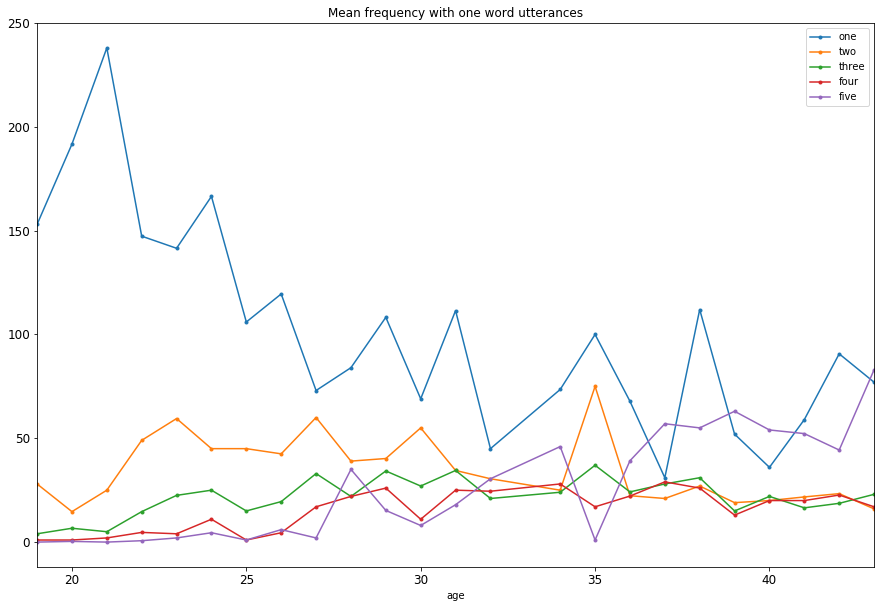

In [8]:
plt.figure()
df2 = df.groupby('age').mean().reset_index()
df2.set_index('age').plot.line(rot=0, style='.-', markevery=1, title='Mean frequency with one word utterances', figsize=(15,10), fontsize=12)
plt.show()

In [9]:
writer = pd.ExcelWriter('Bolkuiken.xlsx')
df.to_excel(writer,'Sheet1')
writer.save()

In [14]:
df_age = pd.read_excel('Bolkuiken.xlsx')

In [10]:
df1_com = df.groupby('age').count()

In [16]:
df2_com = df_age.groupby('age.1').count()

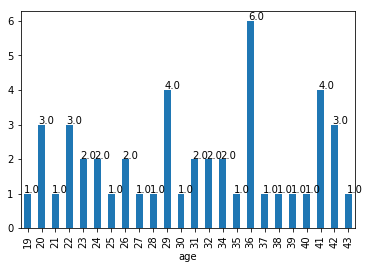

In [11]:
# Before coelescing ages
ax = df1_com['fname'].plot(kind='bar') 
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

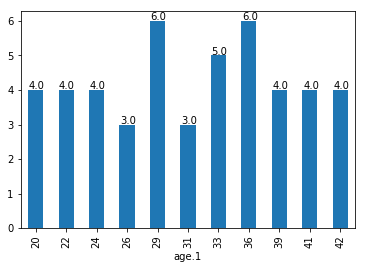

In [17]:
# After coelescing ages
ax = df2_com['fname'].plot(kind='bar') 
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

In [18]:
df_age = df_age.drop('age', axis = 1)

In [20]:
df_ageno1 = df_age.drop('one', axis = 1)

In [21]:
df_ageno1['sum'] = df_ageno1.loc[:, 'two':'five'].sum(axis = 1)

In [22]:
df_perage = df_ageno1
df_perage.loc[:, 'two':'five'] = df_ageno1.loc[:, 'two':'five'].div(df_ageno1['sum'], axis = 0)
df_perage = df_perage.drop(['sum'], axis = 1)

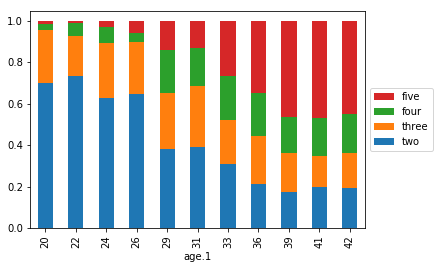

In [23]:
ax = df_perage.groupby('age.1').mean().plot.bar(legend = 'reverse', stacked = True)
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()